## The script is inent to build a baseline model for creditcard fraud detection.

In [ ]:
import os,datetime
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, average_precision_score,f1_score,fbeta_score

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split,StratifiedKFold

### Load data and engineer features as discussed in explanatory analysis

In [3]:
creditcard=pd.read_csv('creditcard.csv')

In [ ]:
df2=creditcard
df2['Hour']=df2['Time'].apply(lambda x : datetime.datetime.fromtimestamp(x).hour)
df2['Amount_A']=np.log10(creditcard['Amount']+1)
df2['V1_A']=np.log10(-creditcard['V1']+3)

### Create one-hot vectors for Hour.

In [4]:
Hour= pd.get_dummies(df2['Hour'],prefix='Hour')
df2 = pd.concat([df2,Hour],axis=1)
df2 = df2.drop(["Hour"], axis=1)

remove=["Time","V1","V6","V8","V13","V15","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Amount_A"]
df2= df2.drop(remove, axis =1)

In [17]:
df2.describe

<bound method NDFrame.describe of                V2        V3        V4        V5        V7        V9       V10  \
0       -0.072781  2.536347  1.378155 -0.338321  0.239599  0.363787  0.090794   
1        0.266151  0.166480  0.448154  0.060018 -0.078803 -0.255425 -0.166974   
2       -1.340163  1.773209  0.379780 -0.503198  0.791461 -1.514654  0.207643   
3       -0.185226  1.792993 -0.863291 -0.010309  0.237609 -1.387024 -0.054952   
4        0.877737  1.548718  0.403034 -0.407193  0.592941  0.817739  0.753074   
5        0.960523  1.141109 -0.168252  0.420987  0.476201 -0.568671 -0.371407   
6        0.141004  0.045371  1.202613  0.191881 -0.005159  0.464960 -0.099254   
7        1.417964  1.074380 -0.492199  0.948934  1.120631  0.615375  1.249376   
8        0.286157 -0.113192 -0.271526  2.669599  0.370145 -0.392048 -0.410430   
9        1.119593  1.044367 -0.222187  0.499361  0.651583 -0.736727 -0.366846   
10      -1.176339  0.913860 -1.375667 -1.971383 -1.423236 -1.720408  1.6266

In [5]:
X=df2.iloc[:,df2.columns != 'Class'].as_matrix()
y=df2['Class'].as_matrix()

### Split dataset into training set and test set.

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### Define a neural network classifier.

In [29]:
layers=(100,100,100,100)
learning_rate_init=0.001
alpha=0.0001

#clf = MLPClassifier(solver='adam',activation='tanh',hidden_layer_sizes=layers, learning_rate='adaptive',learning_rate_init=lr_init,alpha=alpha,random_state=2)
clf = MLPClassifier(solver='adam',activation='tanh',
                    hidden_layer_sizes=layers, learning_rate='adaptive',
                    learning_rate_init=learning_rate_init,alpha=alpha,random_state=2345,
                    max_iter=200,verbose=10)


scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

### Scoring the model using 5-fold cross_validation.

In [34]:
scorings ='average_precision'
fold=5
cv=StratifiedKFold(n_splits=fold,random_state=1234)

scores=cross_validate(clf,X_train_scaled,y_train,cv=cv,scoring=scorings,return_train_score=True)
print(scores)

Iteration 1, loss = 0.00664960
Iteration 2, loss = 0.00315918
Iteration 3, loss = 0.00292583
Iteration 4, loss = 0.00287214
Iteration 5, loss = 0.00264921
Iteration 6, loss = 0.00253362
Iteration 7, loss = 0.00244492
Iteration 8, loss = 0.00229898
Iteration 9, loss = 0.00230787
Iteration 10, loss = 0.00210262
Iteration 11, loss = 0.00199712
Iteration 12, loss = 0.00180785
Iteration 13, loss = 0.00194292
Iteration 14, loss = 0.00185288
Iteration 15, loss = 0.00165752
Iteration 16, loss = 0.00154999
Iteration 17, loss = 0.00162433
Iteration 18, loss = 0.00144909
Iteration 19, loss = 0.00142995
Iteration 20, loss = 0.00136478
Iteration 21, loss = 0.00135351
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.00694197
Iteration 2, loss = 0.00339244
Iteration 3, loss = 0.00327720
Iteration 4, loss = 0.00301249
Iteration 5, loss = 0.00288227
Iteration 6, loss = 0.00286443
Iteration 7, loss = 0.00264698
Iteration 8, loss = 0.0025597

In [35]:
np.mean(scores['test_score'])

0.79204081041118723

### Precision-recall Curve for 5-fold cross validation.

Iteration 1, loss = 0.00664982
Iteration 2, loss = 0.00315589
Iteration 3, loss = 0.00292665
Iteration 4, loss = 0.00286547
Iteration 5, loss = 0.00266071
Iteration 6, loss = 0.00251907
Iteration 7, loss = 0.00247056
Iteration 8, loss = 0.00227285
Iteration 9, loss = 0.00230668
Iteration 10, loss = 0.00218743
Iteration 11, loss = 0.00192953
Iteration 12, loss = 0.00194737
Iteration 13, loss = 0.00189251
Iteration 14, loss = 0.00197181
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.00694277
Iteration 2, loss = 0.00339164
Iteration 3, loss = 0.00327984
Iteration 4, loss = 0.00301337
Iteration 5, loss = 0.00288121
Iteration 6, loss = 0.00282871
Iteration 7, loss = 0.00265037
Iteration 8, loss = 0.00254624
Iteration 9, loss = 0.00249120
Iteration 10, loss = 0.00232829
Iteration 11, loss = 0.00226560
Iteration 12, loss = 0.00221143
Iteration 13, loss = 0.00202852
Iteration 14, loss = 0.00196245
Iteration 15, loss = 0.00188938

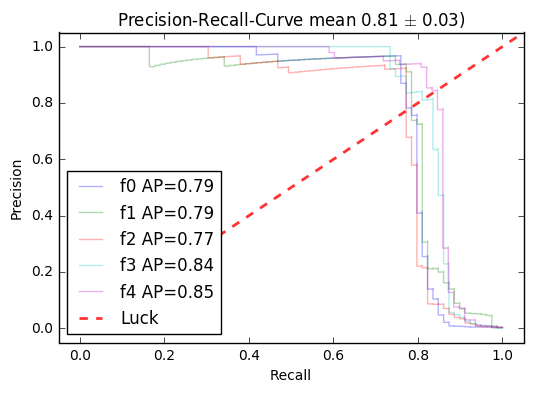

In [36]:

def plot_precision_recall(X,y,cv):
    aps=[]
    f1scores=[]
    f2scores=[]
    best_thresholds_f1=[]
    best_thresholds_f2=[]
    i = 0
    for train, test in cv.split(X, y):
        scaler = StandardScaler() 
        scaler.fit(X[train]) 
        X[train] = scaler.transform(X[train])  
        X[test] = scaler.transform(X[test])  
        
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])[:, 1]
        # Compute precision recall curve and area the curve
        precision, recall, thresholds = precision_recall_curve(y[test], probas_)
        average_precision = average_precision_score(y[test], probas_)
       # auc = metrics.auc(recall, precision)
        
        
       
       
        plt.step(recall, precision,lw=1, alpha=0.3,
                 label=r'f%d AP=%0.2f' % (i,average_precision))
        aps.append(average_precision)
        
    

        
        
        f1score=2*precision*recall/(precision+recall)  
        f2score=5*precision*recall/(4*precision+recall) 

        f1scores.append(np.amax(f1score))
        f2scores.append(np.amax(f2score))
        best_thresholds_f1.append(thresholds[np.argmax(f1score)])
        best_thresholds_f2.append(thresholds[np.argmax(f2score)])    
         
                
         
#        print("Fold=%d max F1 score" % i)
#        print(metrics.classification_report(y[test],proba_temp))
#        print(metrics.confusion_matrix(y[test],proba_temp))
        
        
#        print("Fold=%d max F2 score" % i)
#        print(metrics.classification_report(y[test],proba_temp))
#        print(metrics.confusion_matrix(y[test],proba_temp))   
        
        i += 1
        
        
    plt.plot([0, 3], [0, 3], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    mean_aps = np.mean(aps, axis=0)
    std_aps= np.std(aps)
    #mean_tpr[-1] = 1.0
    #mean_auc = auc(mean_fpr, mean_tpr)
    
    #plt.plot(mean_fpr, mean_tpr, color='b',
    #         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
    #         lw=2, alpha=.8)
    
    #std_tpr = np.std(tprs, axis=0)
    #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                 label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall-Curve mean %0.2f $\pm$ %0.2f)' % (mean_aps, std_aps))
    plt.legend(loc="lower left")
    plt.show()
    return  f1scores,f2scores,best_thresholds_f1,best_thresholds_f2

f1scores,f2scores,best_thresholds_f1,best_thresholds_f2=plot_precision_recall(X_train,y_train,cv)

The plot shows the model can achieve around 0.8 recall as well as keep the precision around 0.8. That measns the model can detect around 80% of frauds without interfering a lot of customers. However, the curves drop down rapidly when recall is large than 0.8. So if you want to increase the recall above 80%, the pay-off is very expensive as a great number of customers being inspected but only gains a few more frauds being found.


### Predict the test set.

In [21]:
from sklearn.metrics import f1_score, fbeta_score,precision_recall_curve,average_precision_score


scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)




probas_ = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
y_score=clf.predict_proba(X_test_scaled)[:,1]

#precision, recall, thresholds = precision_recall_curve(y_test, probas_)
average_precision = average_precision_score(y_test, probas_)




predict=(probas_>0.5).astype(int)
            
f1score=f1_score(y_test,predict)   
f2score=fbeta_score(y_test,predict,beta=2)

print("Ap= ",average_precision)        
print("f1 score: ",f1score)
print("f2 score: ",f2score)
print(metrics.classification_report(y_test,predict))
print(metrics.confusion_matrix(y_test,predict))

Iteration 1, loss = 0.00602519
Iteration 2, loss = 0.00335054
Iteration 3, loss = 0.00309187
Iteration 4, loss = 0.00300963
Iteration 5, loss = 0.00281032
Iteration 6, loss = 0.00265722
Iteration 7, loss = 0.00267369
Iteration 8, loss = 0.00237937
Iteration 9, loss = 0.00235962
Iteration 10, loss = 0.00230271
Iteration 11, loss = 0.00212372
Iteration 12, loss = 0.00205882
Iteration 13, loss = 0.00191830
Iteration 14, loss = 0.00195169
Iteration 15, loss = 0.00186611
Iteration 16, loss = 0.00174457
Iteration 17, loss = 0.00169585
Iteration 18, loss = 0.00159137
Iteration 19, loss = 0.00146517
Iteration 20, loss = 0.00146261
Iteration 21, loss = 0.00138637
Iteration 22, loss = 0.00138912
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Ap=  0.801776771171
f1 score:  0.817204301075
f2 score:  0.791666666667
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.86      0.78   